# 0. Introduction

PennyLane est une plateforme logicielle à code source ouvert pour le calcul quantique différentiable, développée par Xanadu.


# 1.  Les bases : circuit, machine et QNode


Importez PennyLane. 

In [3]:
import pennylane as qml
import numpy as np

Dans PennyLane, un circuit est représenté par une fonction quantique. Une fonction quantique est une fonction Python qui doit contenir une ou plusieurs opérations quantiques et renvoyer une ou plusieurs mesures quantiques.

In [4]:
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

Pour créer un circuit quantique, il faut spécifier la machine sur laquelle le circuit sera exécuté (‘[device](https://docs.pennylane.ai/en/stable/code/qml_devices.html)’). Tout objet de calcul qui peut appliquer des opérations quantiques et renvoyer une valeur de mesure est une machine quantique, que ce soit du matériel quantique (MonarQ) ou un simulateur quantique (`default.qubit`, `lightning.qubit`)

Dans PennyLane, `wires` désigne le nombre de qubits. Par défaut, les qubits sont initialisés à l'état $\vert 0 \rangle$.

In [5]:
#"default.qubit" est un simulateur quantique standard
dev = qml.device('default.qubit', wires = 2) #Machine quantique à 2 qubits

Pour faire un calcul quantique, il faut un [QNode](https://docs.pennylane.ai/en/stable/code/api/pennylane.QNode.html). Un QNode est une encapsulation abstraite d'une fonction quantique, décrite par un circuit quantique. Il permet de lier le circuit quantique à la machine. Les QNodes peuvent facilement être créés avec le décorateur `qnode` (`@qml.qnode(dev)`).

Le QNode est utilisé pour calculer le résultat d'un circuit quantique et peut calculer des résultats de manière classique. Par exemple, nous allons exécuter les résultats de la fonction quantique en créant un circuit QNode et en passant les paramètres $x$ et $y$ dans la fonction quantique. Ensuite, une porte $RZ$, une porte $CNOT$ et une porte $RY$ seront appliquées au circuit.


In [6]:
@qml.qnode(dev) # Décorateur qnode
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

La fonction `draw_mpl` permet de visualiser le circuit créé par la fonction `quantum_function()`.

(<Figure size 600x300 with 1 Axes>, <Axes: >)


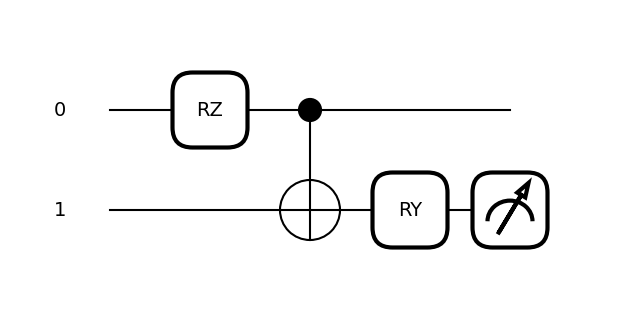

In [7]:
result = qml.draw_mpl(quantum_function)(np.pi/3, 0.5)
print(result)